# Locally Weighted Regression

### 1) Read and Normalise the Dataset 

### 2) Generate W for every query point

### 3 ) No training is involved , directly make predictions using closed form solution we derived ! 

### 4) find the best value of tau (Bandwidth Parameter ) [Cross validation ]

## Loading Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv("Train2.csv")

In [3]:
Xval = dfx.values
X = Xval[: , : -1]
Y = Xval[: , -1]
print(X.shape)
print(Y.shape)
print(X)
print(type(X))
print(Y)
print(type(Y))

(1600, 5)
(1600,)
[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]
<class 'numpy.ndarray'>
[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]
<class 'numpy.ndarray'>


In [4]:
X = (X - X.mean()) / X.std()

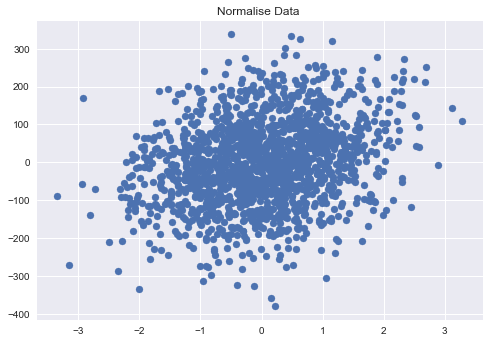

In [5]:
plt.style.use("seaborn")
plt.title("Normalise Data ")
plt.scatter(X[: , 0] , Y)
#plt.xlim(-2 , 2)
#plt.ylim(-2  ,4)
plt.show()

###   find out W (m*m)

In [6]:
ones = np.ones((X.shape[0] , 1))
X = np.hstack((ones , X))
print(X.shape)

(1600, 6)


### Make prediction

In [7]:
def hypothesis(X , theta ):
    return np.dot(X , theta)


def error(X , y ,theta):
    e = 0 
    m = X.shape[0]
    y_ = hypothesis(X , theta)
    e = np.sum((y - y_)**2)
    return e/m
def gradient(X , y ,theta):
    y_ = hypothesis(X , theta)
    grad = np.dot(X.T , (y_ - y))
    m = X.shape[0]
    
    
    return grad/m

def gradient_descent(X,y,lr=0.1 ,max_iters=300):
    n=X.shape[1]
    theta = np.zeros((n,))
    error_list=[]
    for i in range(max_iters):
        e = error(X , y ,theta)
        error_list.append(e)
        grad = gradient(X , y ,theta)
        theta = theta - lr*grad
    return theta , error_list
      

In [8]:
theta , error_list = gradient_descent(X , Y)

In [9]:
y_= hypothesis(X , theta)

In [10]:
print(theta.shape)
print(type(Y))

(6,)
<class 'numpy.ndarray'>


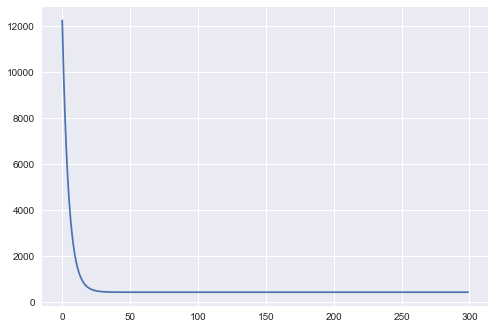

In [11]:
plt.plot(error_list)
plt.show()

In [12]:
X_test =  pd.read_csv("Test2.csv")

In [13]:
X_test =  X_test.values            

In [14]:
ones = np.ones((X_test.shape[0] , 1))
X_test = np.hstack((ones , X_test))
print(X_test.shape)
yans = hypothesis(X_test, theta)

(400, 6)


In [15]:
def r2_score(y , y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y - y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [16]:
r2_score(Y , y_)

96.60939669975616

In [17]:
print(yans)

[ 111.67892871  115.12666586  -25.38451475  -47.70203638  -99.96214912
  -48.27565835  -79.50333497   20.42345566  171.25211384  170.2607681
 -109.50105571  -24.44159574   -7.46114547  120.1401012    36.99998855
   42.43428954 -194.18437616   19.20860754    8.17756117  133.55547754
   61.74192257  -65.85160206 -112.30857873  -10.97902554  -62.36826246
    8.42683726   25.86966015  104.74538943   20.75124601  -29.77336654
  108.04369164  -48.64996463  214.44996164  -17.46250263 -233.37060443
  152.21005756   -5.76458314    9.26542081 -313.5078994    74.00261185
  -85.1753456  -211.28110247 -243.58544562  131.96209815  -77.67843543
  102.50944271   -7.13690665   17.1895467  -102.07740473  -31.19292253
    7.34793543 -178.9371108    61.982719   -101.8639012  -110.25466753
 -160.31522894   59.34885216  105.69191109  -78.54196151   38.43951321
   37.92137654  -54.60671167  162.2555262    40.27337338   53.71950048
   20.72538344   78.59402293   -5.33949769   -6.64082954   -1.7070731
  -27.59

In [18]:
df = pd.DataFrame(data=yans  , columns=[ "target"])
df.to_csv("yans.csv", index = True)
df.head()

,target
0,111.678929
1,115.126666
2,-25.384515
3,-47.702036
4,-99.962149
